# Polynomial Linear Regression
## This model is developed with a dummy artificial dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


## EDA

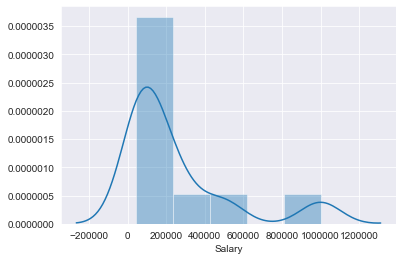

In [4]:
sns.set_style('darkgrid')
sns.distplot(dataset['Salary'])

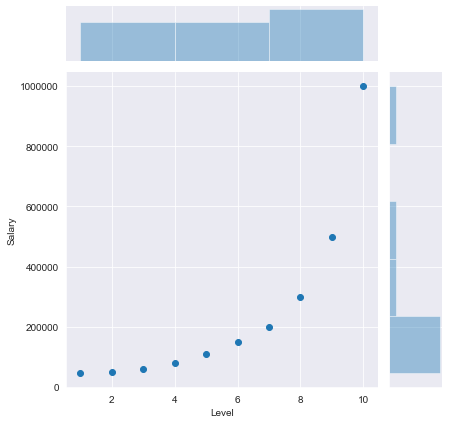

In [5]:
# joint plot gives an intuition that Simple Linear Regression might not give a good level of fit 
sns.jointplot(x = 'Level',y='Salary', data=dataset)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

 * I will attempt to create a simple Linear Regression model vs Polynominal Linear Regression model to show the level of model fit *

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_model = LinearRegression()

In [10]:
lin_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lin_model.predict([[6]])[0]

289939.393939394

## Performance Analysis

In [12]:
print(f'Actutal value {y[5]} vs Prediction{lin_model.predict([[6]])[0]}')

Actutal value 150000 vs Prediction289939.393939394


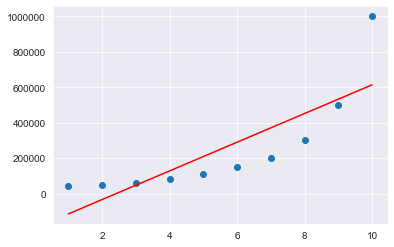

In [13]:
plt.scatter(X,y)
plt.plot(X,lin_model.predict(X),color = 'red')

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
pf = PolynomialFeatures(degree=3)
Xpoly = pf.fit_transform(X)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

* Now applying the Simple Linear Regression model on the ploynomial Features *

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
poly_model = LinearRegression()
poly_model.fit(Xpoly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
pf.transform([[6]])

array([[  1.,   6.,  36., 216.]])

In [19]:
poly_model.predict(pf.transform([[6]]))[0]

104820.51282051404

## Performance Analysis

In [20]:
print(f'Actutal value {y[5]} Vs Prediction :{poly_model.predict(pf.transform([[6]]))[0]}')

Actutal value 150000 Vs Prediction :104820.51282051404


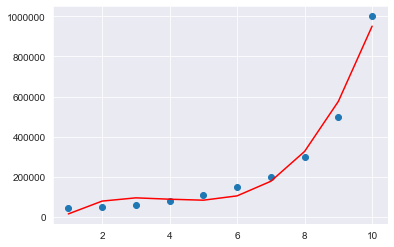

In [21]:
plt.scatter(X,y)
plt.plot(X,poly_model.predict(Xpoly),color = 'red')